In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import scipy
import math
from warnings import filterwarnings
filterwarnings('ignore')

# Необходимые сведения из высшей математики (линейная алгебра, математический анализ, теория вероятности)
<p>Курс "Модели и методы интеллектуального анализа данных"</p>


Математические объекты и методы играют важнейшую роль в исследовании данных. Далее описаны некоторые основные базовые понятия и методы из линейной алгебры, математического анализа и теории вероятности, которые используются при работе с данными. При этом математические понятия разбираются в контексте их использования в языке Python (библиотеки numpy, pandas, scipy). Для более глубокого изучения рекомендуется обратиться к соответствующим книгам из списка литературы.

# Оглавление <a name=toc>
<ol>
    <li><a href='#algebra'>Линейная алгебра</a>
        <ol>
        <li><a href='#algebra_vectors'>Векторы</a></li>
        <li><a href='#algebra_matrixes'>Матрицы</a></li>
        </ol>
    </li>
    <li><a href='#matan'>Математический анализ</a>
        <ol>
        <li><a href='#matan_func'>Функции одной переменной</a></li>
        <li><a href='#matan_deriv'>Производные</a></li>
        <li><a href='#matan_fmp'>Функции нескольких переменных</a></li>
        <li><a href='#matan_partial'>Частные производные.</a></li>
        <li><a href='#matan_gradient'>Градиент. Градиентные методы</a></li>
        </ol>
    </li>
    <li><a href='#probability'>Теория вероятностей</a>
        <ol>
        <li><a href='#prob_def'>Определение вероятности</a></li>
        <li><a href='#prob_bayes'>Формула Байеса</a></li>
        </ol>    
    </li>
    <li><a href='#statistics'>Математическая статистика</a>
    </li>
    <li><a href='#lit'>Литература</a>
    </li>
</ol>

# Линейная алгебра <a name='algebra'></a>

Алгебра - раздел высшей математики, который изучает различные пространства, операции в этих пространствах и их свойства. Примеры пространств:
- пространство действительных чисел $R=(-\infty, \infty)$,
- пространство векторов,
- пространство матриц.

Линейная алгебра изучает векторные пространства.

В библиотеке numpy есть специальный модуль линейной алгебры linalg.

In [2]:
np.info(np.linalg)

Core Linear Algebra Tools
-------------------------
Linear algebra basics:

- norm            Vector or matrix norm
- inv             Inverse of a square matrix
- solve           Solve a linear system of equations
- det             Determinant of a square matrix
- lstsq           Solve linear least-squares problem
- pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                  value decomposition
- matrix_power    Integer power of a square matrix

Eigenvalues and decompositions:

- eig             Eigenvalues and vectors of a square matrix
- eigh            Eigenvalues and eigenvectors of a Hermitian matrix
- eigvals         Eigenvalues of a square matrix
- eigvalsh        Eigenvalues of a Hermitian matrix
- qr              QR decomposition of a matrix
- svd             Singular value decomposition of a matrix
- cholesky        Cholesky decomposition of a matrix

Tensor operations:

- tensorsolve     Solve a linear tensor equation
- tensorinv       Calcul

Как видно из описаний модуль numpy.linalg содержит функции для работы с векторами и матрицами, решения уравнений, работы с тензорами и другие возможности.

## Векторы <a name='algebra_vectors'></a>

Скаляр - это число. Вектор - это набор чисел. Векторы можно складывать и вычитать, умножать на число (скаляр). Также для векторов определены два вида умножения - скалярное ($\vec{a} \cdot \vec{b}$) и векторное ($\vec{a} \times \vec{b}$) произведения векторов.

$$
\vec{a}=(a_1, a_2, a_3), \vec{b}=(b_1, b_2, b_3)
$$

$$
\vec{a}\pm\vec{b} = (a_1 \pm b_1, a_2 \pm b_2, a_3 \pm b_3)
$$

$$
k \vec{a} = (ka_1, ka_2, ka_3)
$$

$$
\vec{a} \cdot \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3
$$

$$
\vec{a} \cdot \vec{b} = \left| \vec{a} \right| \left| \vec{b} \right| \cos (\alpha),~\alpha - угол~между~векторами~\vec{a}~и~\vec{b}.
$$

$$
\vec{a} \times \vec{b} = \left| \vec{a} \right| \left| \vec{b} \right| \sin (\alpha),~\alpha - угол~между~векторами~\vec{a}~и~\vec{b}.
$$

Для работы с векторами в Python можно использовать обычные списки, либо массивы numpy (в которых оптимизирована работа с большими векторами). Также в библиотеке pandas есть специальный тип pandas.Series для задания вектора.

#### Список python

In [3]:
рост_вес = [180, 80]
рост_вес[0]*рост_вес[1]

14400

#### Массив numpy.array

In [4]:
a = np.array([180,80], dtype='int32')
print(a**2)

[32400  6400]


При работе с большими числами важно обращать внимание на то, чтобы размера памяти для хранения элементов массива было достаточно. В частности, при очень больших значениях элементов массива типа элемента 'int32' не хватает.

In [5]:
print(a**5)
a = np.array([180,80], dtype='int64')
print(a**5)

[  -21761024 -1018167296]
[188956800000   3276800000]


#### Скалярное произведение в numpy

In [6]:
a = np.array([1, 2])
b = np.array([3, 4])
a.dot(b)

11

#### Объект pandas.Series

In [7]:
ds = pd.Series(np.array([1,2,3]))
display(ds)
print("Сумма элементов: {}".format(ds.sum()))

0    1
1    2
2    3
dtype: int32

Сумма элементов: 6


Графически вектор - это направленный отрезок прямой, имеющий начало $A$ и конец $B$. Обозначение: $\vec{AB}$ или просто $\vec{a}$.

Вектор задается координатами начала $(x_0, y_0)$ и конца $(x_1, y_1)$, при этом также задается направление вектора. 

Начало любого вектора можно перенести в точку $(0,0)$, при этом координаты конца вектора будут $(x_1-x_0,y_1-y_0)$.

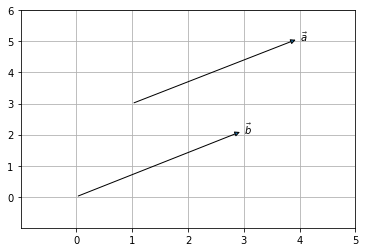

In [8]:
plt.xlim(-1, 5); plt.ylim(-1, 6)
a_begin = np.array ([1, 3]); a_end = np.array ([4, 5])
b_begin = np.array ([a_begin[0]-a_begin[0], a_begin[1]-a_begin[1]]); b_end = np.array ([a_end[0]-a_begin[0], a_end[1]-a_begin[1]])
plt.annotate (u'$\\vec{a}$', xy=a_begin, xytext=a_end, arrowprops={'arrowstyle': '<|-',})
plt.annotate (u'$\\vec{b}$', xy=b_begin, xytext=b_end, arrowprops={'arrowstyle': '<|-',})
plt.grid(True)
plt.xticks(range(6))
plt.yticks(range(7))
plt.show()

#### Сложение и вычитание векторов

Сложение и вычитание двух векторов $\vec{a}=(a_1,a_2)$ и $\vec{b}=(b_1,b_2)$. 

$$
\vec{a} \pm \vec{b}=\vec{c}
$$

$$
\vec{c}=(a_1 \pm b_1, a_2 \pm b_2)
$$

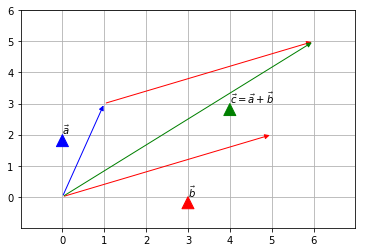

In [9]:
plt.xlim(-1, 7)
plt.ylim(-1, 6)
a = np.array ([1, 3])
b = np.array ([5, 2])
c = a + b
plt.annotate ('', xy=(0, 0), xytext=a, arrowprops={'arrowstyle': '<|-', 'color':'b'})
plt.annotate ('', xy=(0, 0), xytext=b, arrowprops={'arrowstyle': '<|-', 'color':'r'})
plt.annotate ('', xy=a, xytext=a+b, arrowprops={'arrowstyle': '<|-', 'color':'r'})
plt.annotate ('', xy=(0, 0), xytext=c, arrowprops={'arrowstyle': '<|-', 'color':'g'})
plt.annotate("$\\vec{a}$", xy=(0,2) ,xytext=(0,2), arrowprops={'color':'b'})
plt.annotate("$\\vec{b}$", xy=(3,0) ,xytext=(3,0), arrowprops={'color':'r'})
plt.annotate("$\\vec{c}=\\vec{a}+\\vec{b}$", xy=(4,3) ,xytext=(4,3) , arrowprops={'color':'g'})
plt.grid(True)
plt.xticks(range(7))
plt.yticks(range(7))
plt.show()

#### Умножение векторов

Умножение вектора $\vec{a}=(x_1,y_1)$  на число $k$:
$$
k \vec{a} = (kx_1, ky_1)
$$

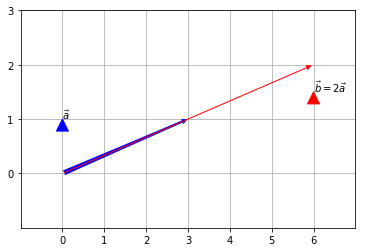

In [10]:
plt.xlim(-1, 7)
plt.ylim(-1, 3)
a = np.array ([3, 1])
b = a * 2
plt.annotate ('', xy=a, xytext=(0, 0), arrowprops={'arrowstyle': 'fancy', 'color':'b'})
plt.annotate ('', xy=(0, 0), xytext=b, arrowprops={'arrowstyle': '<|-', 'color':'r'})
plt.annotate("$\\vec{a}$", xy=(0,1) ,xytext=(0,1), arrowprops={'color':'b'})
plt.annotate("$\\vec{b} = 2\\vec{a}$", xy=(6,1.5) ,xytext=(6,1.5), arrowprops={'color':'r'})
plt.grid(True)
plt.xticks(range(7))
plt.yticks(range(4))
plt.show()

#### Скалярное произведение векторов

Скалярное произведение векторов задается формулой $\vec{a}\cdot\vec{b}=|\vec{a}||\vec{b}|\cos \alpha$, где $\alpha$ - угол между векторами $\vec{a}$ и $\vec{b}$. Кроме того, если заданы декартовы координаты векторов $\vec{a}=(a_1, a_2, a_3)$ и $\vec{b}=(b_1, b_2, b_3)$, то скалярное произведение векторов можно представить в виде $\vec{a}\cdot\vec{b}=a_1 b_1 + a_2 b_2 +a_3 b_3$. Геометрически на плоскости скалярное произведение вектора $\vec{a}=(a_1, a_2)$ на вектор $\vec{a}=(b_1, b_2)$ это модуль (длина) проекции вектора $\vec{a}$ на вектор $\vec{b}$ (или, учитывая переместительное свойство скалярного произведения, вектора $\vec{b}$ на вектор $\vec{a}$).

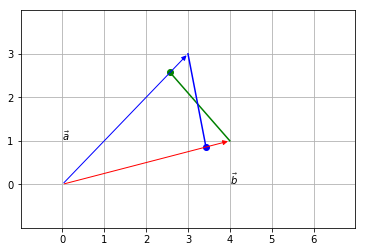

In [11]:
a = np.array ([3, 3])
b = np.array ([4, 1])
plt.xlim(-1, 7)
plt.ylim(-1, 4)
plt.annotate ('', xy=a, xytext=(0, 0), arrowprops={'arrowstyle': '-|>', 'color':'b'})
plt.annotate ('', xy=b, xytext=(0, 0), arrowprops={'arrowstyle': '-|>', 'color':'r'})
plt.annotate("$\\vec{a}$", xy=(0,1), xytext=(0,1))
plt.annotate("$\\vec{b}$", xy=(4,0), xytext=(4,0))
N = a*np.dot(a,b)/np.linalg.norm(a)/np.linalg.norm(b); plt.plot([N[0], b[0]],[N[1], b[1]], c='g');
plt.scatter(N[0],N[1], c='g')
M = b*np.dot(a,b)/np.linalg.norm(a)/np.linalg.norm(b); plt.plot([M[0], a[0]],[M[1], a[1]], c='b'); 
plt.scatter(M[0],M[1], c='b')
plt.grid(True)
plt.xticks(range(7))
plt.yticks(range(4))
plt.show()

## Матрицы <a name='algebra_matrixes'></a>

Матрица - двумерная таблица.

В python матрица реализуется как список списков при использовании встроенных в Python списков, либо с использованием встроенных средст библиотек numpy или pandas.

Пример создания матрицы с помощью списка списков:

In [12]:
A = [[int(i+j) for i in range(3)] for j in range(4)]
print(A)
for row in A:
    print(" ".join([str(elem) for elem in row]))
print(A[1][1])

[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5]]
0 1 2
1 2 3
2 3 4
3 4 5
2


Пример создания двумерного массива с помощью функции numpy.array. Скачала создается одномерный массов чисел, затем из него создается матрица с помощью функции reshape().

In [13]:
B = np.array([i for i in range(1,13)])
print(B, B[4])
B = B.reshape(3,4)
print(B, B[1,0])
type(B)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 5
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 5


numpy.ndarray

Пример создания матрицы с помощью функции numpy.matrix.

In [14]:
C = np.mat([[1,2],[3,4]])
print(C, type(C))

[[1 2]
 [3 4]] <class 'numpy.matrixlib.defmatrix.matrix'>


Пример создания объекта pandas.DataFrame

In [15]:
df = pd.DataFrame(np.array([1,2,3,4]).reshape(2,2))
display(df)

,0,1
0,1,2
1,3,4


#### Вычисление определителя матрицы

In [16]:
A = np.array([[1,2,3],[0,2,1],[5,4,2]])
np.linalg.det(A)

-19.999999999999996

#### Операции над матрицами: сложение, вычитание, умножение, транспонирование.

Пусть заданы матрицы
$$
A = \left( 
\begin{array}{lll}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} 
\end{array}
\right),
~~
B = \left( 
\begin{array}{lll}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33} 
\end{array}
\right),
~~
$$

Умножение матрицы A на число k
$$
k A = \left( 
\begin{array}{lll}
ka_{11} & ka_{12} & ka_{13} \\
ka_{21} & ka_{22} & ka_{23} \\
ka_{31} & ka_{32} & ka_{33} 
\end{array}
\right)
$$

Сумма матриц A+B
$$
A\pm = \left( 
\begin{array}{lll}
a_{11} \pm b_{11} & a_{11} \pm b_{12} & a_{11} \pm b_{13} \\
a_{21} \pm b_{21} & a_{21} \pm b_{22} & a_{21} \pm b_{23} \\
a_{31} \pm b_{31} & a_{31} \pm b_{32} & a_{31} \pm b_{33} 
\end{array}
\right)
$$

Произведение матриц A и B

$$
AB = 
\left( 
\begin{array}{lll}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} 
\end{array}
\right)
\left( 
\begin{array}{lll}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33} 
\end{array}
\right)
=
$$

$$
=
\left( 
\begin{array}{lll}
a_{11}b_{11}+a_{12}b_{21}+a_{13}b_{31} & a_{11}b_{12}+a_{12}b_{22}+a_{13}b_{32} & a_{11}b_{13}+a_{12}b_{23}+a_{13}b_{33} \\
a_{21}b_{11}+a_{22}b_{21}+a_{23}b_{31} & a_{21}b_{12}+a_{22}b_{22}+a_{33}b_{32} & a_{21}b_{13}+a_{22}b_{23}+a_{23}b_{33} \\
a_{31}b_{11}+a_{32}b_{21}+a_{33}b_{31} & a_{31}b_{12}+a_{32}b_{22}+a_{33}b_{32} & a_{31}b_{13}+a_{32}b_{23}+a_{33}b_{33}
\end{array}
\right)
$$


Транспонированная матрица $A^T$ определяется следующим образом:

$$
A^T = \left( 
\begin{array}{lll}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} 
\end{array}
\right)^T
=
\left( 
\begin{array}{lll}
a_{11} & a_{12} & a_{31} \\
a_{12} & a_{22} & a_{32} \\
a_{13} & a_{23} & a_{33} 
\end{array}
\right)
$$


In [17]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,2],[3,4]])
print("Сложение матриц")
print(np.add(A,B))
print("Вычитание матриц")
print(np.subtract(A,B))
print("Произведение матриц")
print(np.dot(A,B))
print("Обратная матрица")
print(A.T)

Сложение матриц
[[2 4]
 [6 8]]
Вычитание матриц
[[0 0]
 [0 0]]
Произведение матриц
[[ 7 10]
 [15 22]]
Обратная матрица
[[1 3]
 [2 4]]


Матрица, обратная к матрице $A$, обозначается $A^{-1}$ и обладает следующим свойством: $A A^{-1} = E$, где $E$ - единичная матрица (элементы на главной диагонали равны 1, остальные элементы равны нулю). Вычисление обратной матрицы

In [18]:
A = np.array([np.random.choice([0,1,2,3]) for _ in range(25)]).reshape(-1,5)
print(A)
invA = np.linalg.inv(A)
print(invA)
I = np.dot(A, invA)
print("I=")
for row in I:    
    print("   ".join([str(round(i,2)) for i in row]))

[[0 3 3 2 2]
 [0 1 0 2 1]
 [2 1 0 1 0]
 [1 1 2 3 1]
 [3 2 1 1 2]]
[[-0.14893617 -0.21276596  0.14893617  0.12765957  0.19148936]
 [ 0.40425532  0.14893617  0.59574468 -0.4893617  -0.23404255]
 [ 0.12765957 -0.53191489 -0.12765957  0.31914894 -0.0212766 ]
 [-0.10638298  0.27659574  0.10638298  0.23404255 -0.14893617]
 [-0.19148936  0.29787234 -0.80851064  0.0212766   0.53191489]]
I=
1.0   0.0   0.0   0.0   0.0
0.0   1.0   0.0   0.0   0.0
-0.0   0.0   1.0   0.0   0.0
0.0   0.0   0.0   1.0   0.0
0.0   0.0   0.0   0.0   1.0


#### Ранг матрицы

Рангом матрицы называется порядок наибольшего минора матрицы, определитель которого отличен от нуля.

In [19]:
A = np.array([[1,2,3],[0,2,1],[5,4,2]])
np.linalg.matrix_rank(A)

3

#### Собственные векторы матрицы. Собственные числа.

Собственные векторы матрицы A это векторы, которые при применении линейного преобразования с помощью матрицы A изменяются только в масштабе, но не в направлении.
$$
A \vec{v} = \lambda \vec{v}
$$

In [20]:
A = np.array([[1,2],[3,4]])

In [21]:
np.linalg.eig(A)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

#### След матрицы

След матрицы это сумма элементов, стоящих на главной диагонали

In [22]:
A = np.array(range(1,10)).reshape(-1,3)
print(A)
print(np.diagonal(A))
print(np.trace(A))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 5 9]
15


#### Практические задачи с применением матриц.

Матрицы используются для линейных преобразований пространства. Например, если задан вектор, то его умножение на матрицу приведет к изменению этого вектора - растяжению, повороту относительно начала координат.

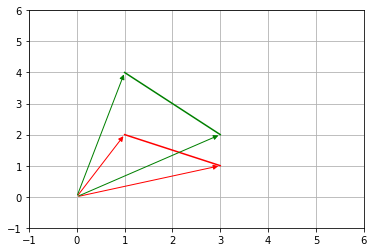

In [23]:
plt.xlim(-1, 6)
plt.ylim(-1, 6)
M1 = np.array([1, 2]); M2 = np.array([3, 1])
A = np.array([[1,0],[0,2]])
M3 = M1.dot(A); M4 = M2.dot(A);
plt.plot([M1[0], M2[0]],[M1[1], M2[1]], c='r')
plt.annotate(u'', xy=(0, 0), xytext = M1, arrowprops = {'arrowstyle': '<|-', 'color': 'r'})
plt.annotate(u'', xy=(0, 0), xytext = M2, arrowprops = {'arrowstyle': '<|-', 'color': 'r'})
plt.plot([M3[0], M4[0]],[M3[1], M4[1]], c='g')
plt.annotate(u'', xy=(0, 0), xytext = M3, arrowprops = {'arrowstyle': '<|-', 'color': 'g'})
plt.annotate(u'', xy=(0, 0), xytext = M4, arrowprops = {'arrowstyle': '<|-', 'color': 'g'})
plt.grid(True)
plt.show()

In [24]:
print(M1, M2, M3, M4)
print(A)

[1 2] [3 1] [1 4] [3 2]
[[1 0]
 [0 2]]


Матрицы используют для решения систем линейных алгебраических уравнений (матодом Крамера, методом обратной матрицы).

Например, решим систему линейных уравнений методом Крамера

$$
\left\{
\begin{array}{l}
x+2y=5,\\
3x+4y=6
\end{array}
\right.
$$

Эту систему уравнений можно представить в матричном виде

$$
A\vec{X}=\vec{B},
~~
A= \left( 
\begin{array}{cc}
1 & 2 \\ 3 &4
\end{array}
\right),
~~
\vec{X}=\left( \begin{array}{c} x\\ y \end{array} \right),
~~
\vec{B}=\left( \begin{array}{c} 5\\ 6 \end{array} \right).
$$

In [25]:
A = np.array([1,2,3,4]).reshape(2,2)
B = np.array([5,6])
D1 = np.linalg.det(np.array([5,2,6,4]).reshape(2,2))
D2 = np.linalg.det(np.array([1,5,3,6]).reshape(2,2))
D  = np.linalg.det(np.array([1,2,3,4]).reshape(2,2))
x = D1/D; y = D2/D
print("Корни уравнений: {} и {}".format(x,y))

Корни уравнений: -4.0 и 4.5


Решим эту же систему методом обратной матрицы по формуле
$$
\vec{X} = A^{-1} \vec{B}.
$$

In [26]:
X = np.linalg.inv(A).dot(B)
print(X)

[-4.   4.5]


# Математический анализ <a name='matan'></a>

Математический анализ изучает функции одной и нескольких переменных и их свойства, используя понятие непрерывности, которое определяется через последовательности. Для непрерывных функций вводится важнейший математический инструмент - производная. Также в математическом анализе изучаются интегралы, ряды.

## Функции <a name='matan_func'></a>

Основными объектами исследований в задачах математического анализа являются функции.

Простейшие функции - элементарные. Это - степенная функция $y=x^n$, показательная функция $y=a^x$ (важным частным случаем которой является экспоненциальная функция $y=e^x$, где $e$ - экспонента), тригонометрические функции, логарифмические функции.

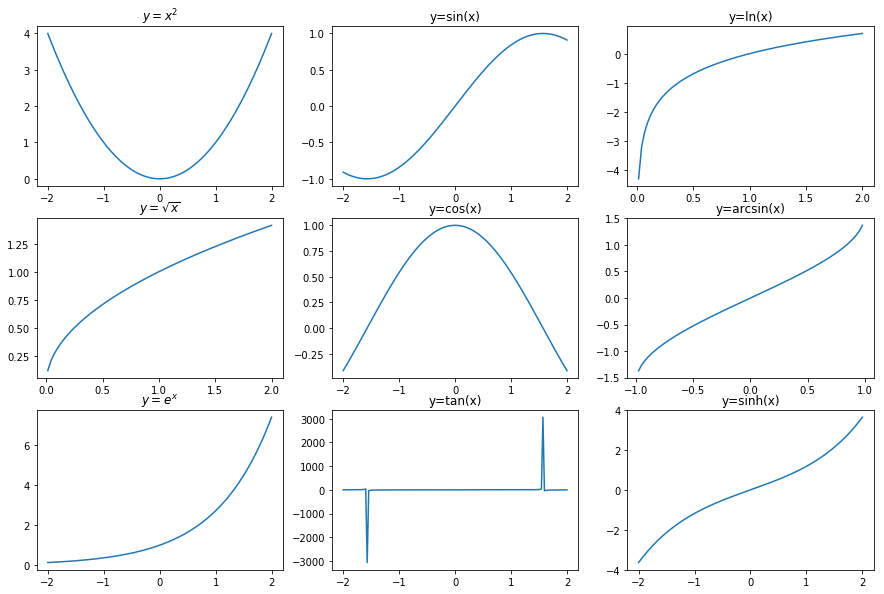

In [27]:
plt.rcParams['figure.figsize']=(15,10)
xs = np.linspace(-2, 2, 150)
titles = ["$y=x^2$", "$y=\sqrt{x}$", "$y=e^x$", 
          "y=sin(x)", "y=cos(x)", "y=tan(x)",
          "y=ln(x)", "y=arcsin(x)", "y=sinh(x)"
         ]
functions = [xs**2, xs**(1/2), np.exp(xs), np.sin(xs), np.cos(xs), np.tan(xs), np.log(xs), np.arcsin(xs), np.sinh(xs)]
fig, ax = plt.subplots(3,3)
for pos in range(9):
    ax[pos%3][pos//3].plot(xs, functions[pos]); ax[pos%3][pos//3].set_title(titles[pos])
plt.show()

## Производные <a name='matan_deriv'></a>

Производной функции называется предел отношения приращения функции $\Delta f = f(x + \Delta x)-f(x)$  к приращению аргумента этой функции $\Delta x$ при $\Delta x \to 0$.

$$f'(x)=\frac{df}{dx}=\lim_{\Delta x \to \infty}\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Производная $f'(x)$ характеризует скорость изменения функции.

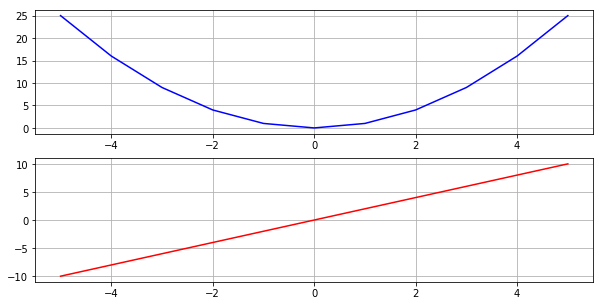

In [28]:
plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots(2)
ax[0].plot([x for x in range(-5,6)], [x**2 for x in range(-5,6)], color='b')
ax[1].plot([x for x in range(-5,6)], [2*x for x in range(-5,6)], color='r')
for i in [0,1]: ax[i].grid(True)
plt.show()

Видим на рисунке, что для тех $x$, для которых $f'(x)<0$, функция $f(x)$ убывает (причем, чем меньше $f'(x)$, тем быстрее убывает $f(x)$), а для $x$ при которых $f'(x)>0$, функция $f(x)$ возрастает (причем чем больше $f'(x)$, тем быстрее возрастает $f(x)$). В точке $x_*$ в которой $f'(x_*)=0$ находится экстремум - минимум функции $f(x)$.

Геометрический смысл производной - производная $y'(x_0)$ функции $y(x)$ в точке $x_0$ равна тангенсу угла графика наклона касательной прямой к функции $y(x)$ в точке $x_0$.

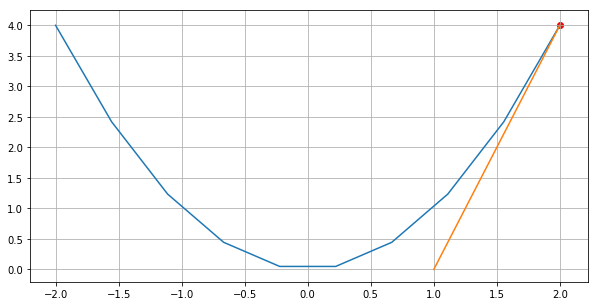

In [29]:
xs = np.linspace(-2,2,10)
ys = xs**2
plt.plot(xs,ys)
plt.grid(True)
plt.scatter(2,4,c='r')
plt.plot([2,1],[4,0])
plt.show()

## Функции нескольких переменных <a name='matan_fmp'></a>

Функции нескольких переменных зависят от нескольких переменных. Например, функция $F(x,y,z)=x^2+y^2+z^2$ зависит от переменных $x$, $y$, $z$. По каждой из этих переменных можно взять производную, такие производные называются частными.

$$F(x,y)=x^3+y^3$$

In [30]:
from sympy import *
x, y = symbols('x y')
r1 = diff(x**3 + y**3, x)
r2 = diff(x**3 + y**3, x)
print(type(r1))
print(r1,r2)

<class 'sympy.core.mul.Mul'>
3*x**2 3*x**2


## Градиент. Градиентные методы <a name='matan-gradient'></a>

Вектор, составленный из частных производных функции $F(x,y$ называется градиентом. Важное свойство вектора градиента - он указывает в направлении наискорейшего возрастания функции.

$$\nabla F(x,y)=(F_x,F_y)$$

С использованием метода градииента работают методы поиска экстремума (максимума или минимума) функций нескольких переменных. Суть метода:
- выбирается начальная точка
- их этой точки делается шаг длины $h$ в направлении вектора градиента (если ищется максимум) или антиградиента (если ищется минимум)
- далее процедура повторяется из новой точки

In [31]:
def grad_step(f, xp, yp, h):
    fx = (f(xp + h,yp  )   - f(xp,yp))/h
    fy = (f(xp  ,  yp + h) - f(xp,yp))/h
    L = math.sqrt(fx**2+fy**2)
    xn = xp - h*fx/L
    yn = yp - h*fy/L
    return xn, yn

Зададим функцию $y(x)=(x-1)^2+2(y-2)^2$. Это парабалоид оси которого направлены вверх. Очевидно он имеет минимум в точке $(x=1, y=2)$ равный $0$.

In [32]:
def f(x,y):
    return (x-1)**2 + 2*(y-2)**2

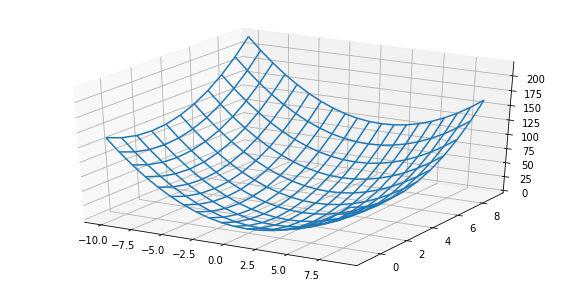

In [49]:
u, v = np.mgrid[-10:10, -1:10]
x = u
y = v
z = (u-1)**2+2*(v-2)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
#ax.scatter(1, 2, 0, c='r', s=100)
plt.show()

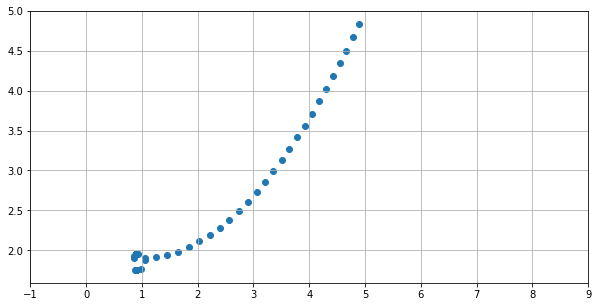

In [34]:
s=[]
xt, yt = 5, 5
for _ in range(100):
    xt, yt = grad_step(f, xt, yt, 0.2)
    s.append((xt,yt))
plt.scatter([i[0] for i in s],[i[1] for i in s])
plt.grid(True)
plt.xticks(range(-1,10))
plt.show()    

In [35]:
s[-5:]

[(0.8999999999999999, 1.758377005960798),
 (0.9, 1.958377005960798),
 (0.8999999999999999, 1.758377005960798),
 (0.9, 1.958377005960798),
 (0.8999999999999999, 1.758377005960798)]

Видим, что из за величины шага $h=1$ метод начал колебаться около искомой точки, не имея возможности к ней приблизиться. Попробуем взять более близкую к месту колебаний точку и уменьшить шаг.

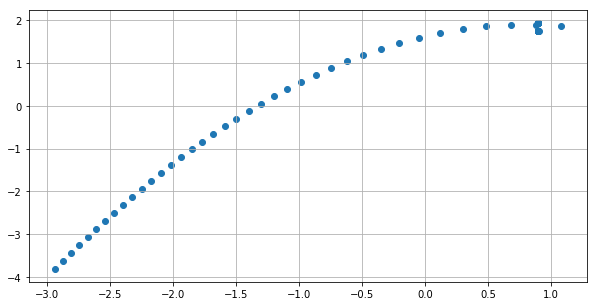

In [36]:
s=[]
xt, yt = -3, -4
for _ in range(100):
    xt, yt = grad_step(f, xt, yt, 0.2)
    s.append((xt,yt))
plt.scatter([i[0] for i in s], [i[1] for i in s])
plt.grid(True)
plt.show()    

In [37]:
s[-5:]

[(0.9000000001520045, 1.7408429736519178),
 (0.9000000000564985, 1.9408429736519177),
 (0.8999999999181675, 1.7408429736519178),
 (0.8999999999695837, 1.9408429736519177),
 (0.900000000044055, 1.7408429736519178)]

Видимо, что с уменьшением шага ($h=0.01$) и выбором более близкого к искомому решению начального приближения ($x_0=1.1$ и $y_0=1$) удалось получить более точное решение с точностью $\epsilon=10^{-3}$.

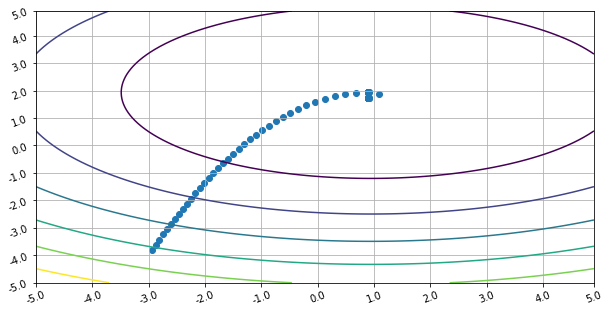

In [38]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
z = [[f(i,j) for i in x] for j in y]

plt.xticks([i for i in range(100) if not i%10]+[len(x)-1],
           [round(x[i]) for i in range(100) if not i%10]+[x[-1]], 
           rotation=20)

plt.yticks([i for i in range(100) if not i%10]+[len(y)-1],
           [round(y[i]) for i in range(100) if not i%10]+[y[-1]], 
           rotation=20)

plt.contour(z)
plt.grid(True)
plt.scatter([(i[0]+5)*10 for i in s], [(i[1]+5)*10 for i in s])

plt.show()

На контурном графике видно, что градиентный метод, начав из точки $(-3, -4)$ и двигаясь в направлении вектора антиградиента с постоянным шагом $h=0.2$, приближается к точке минимума $(-1,-2)$.

## Стохастический градиентный спуск <a name='matan-stochastic-gradient'></a>

Метод стохастического градиентного спуска отличается от рассмотренного пакетного градиентного спуска тем, что при вычислении шага выбирается одно произвольное направление (одна произвольно выбранная координата). На большщих данных это приводит к существенной экономии в ресурсах при вычислении.

In [39]:
def stohastic_grad_step(f, xp, yp, h):
    i = np.random.choice([0,1])
    if i==0:
        f_step = (f(xp + h,yp  )   - f(xp,yp))/h
    else:
        f_step = (f(xp  ,  yp + h) - f(xp,yp))/h
    L = math.sqrt(f_step**2 + f_step**2)
    xn = xp - h*f_step/L
    yn = yp - h*f_step/L
    return xn, yn

Зададим функцию $y(x)=(x-1)^2+2(y-2)^2$. Это парабалоид оси которого направлены вверх. Очевидно он имеет минимум в точке $(x=1, y=2)$ равный $0$.

In [40]:
def f(x,y):
    return (x-1)**2 + 2*(y-2)**2

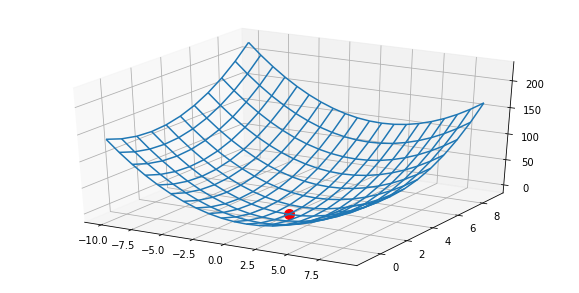

In [41]:
u, v = np.mgrid[-10:10, -1:10]
x = u
y = v
z = (u-1)**2 + 2*(v-2)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.scatter(1, 2, 0, c='r', s=100)
plt.show()

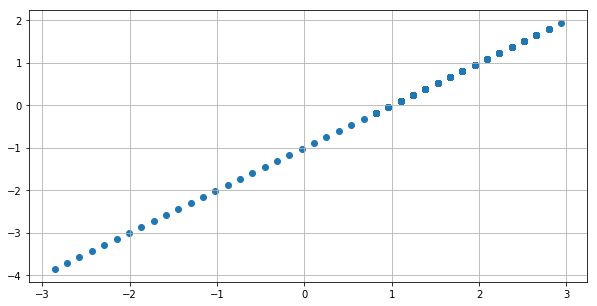

In [42]:
s=[]
xt, yt = -3, -4
for _ in range(300):
    xt, yt = stohastic_grad_step(f, xt, yt, 0.2)
    s.append((xt,yt))
plt.scatter([i[0] for i in s], [i[1] for i in s])
plt.grid(True)
plt.show()    

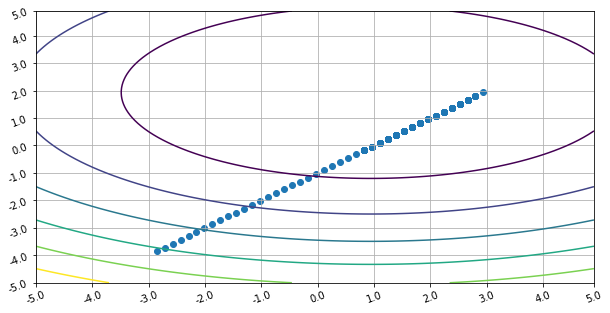

In [43]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
z = [[f(i,j) for i in x] for j in y]

plt.xticks([i for i in range(100) if not i%10]+[len(x)-1],
           [round(x[i]) for i in range(100) if not i%10]+[x[-1]], 
           rotation=20)

plt.yticks([i for i in range(100) if not i%10]+[len(y)-1],
           [round(y[i]) for i in range(100) if not i%10]+[y[-1]], 
           rotation=20)

plt.contour(z)
plt.grid(True)
plt.scatter([(i[0]+5)*10 for i in s], [(i[1]+5)*10 for i in s])

plt.show()

# Теория вероятности <a name='probability'></a>

## Определение вероятности

Упрощенно вероятность наступления какого-либо события задается с помощью фоотношения $P=\frac{m}{n}$, где $m$ - число благоприятных случаев, $n$ - общее число случаев. Например, вероятность выпадения четного числа при бросании игрального шестигранного кубика равна $P=\frac{3}{6}=\frac{1}{2}$, поскольку $m=3$ (выпадение 2, 4 или 6), а $n=6$. $P$ принимает значения от 0 до 1. Значение $1$ соответствует достоверному событию, $0$ - невозможному событию.

## Зависимые и независимые события. Условная вероятность.

Пусть $A$ и $B$ - события, $P(A)$ и $P(B)$ - вероятности этих событий. События $A$ и $B$ называются независимыми, если $P(AB)=P(A)P(B)$.

$P(A|B)$ - вероятность наступления события $A$ при условии наступления события $B$. Для зависимых событий $A$ и $B$ выполняется $P(AB)=P(A)P(B|A)$.

## Теорема Байеса <a name='bayes'></a>

Пусть $H_i,~i\in [0,n]$ независимые события, составляющие полную группу событий (т.е. $\sum_{i=1}^{n}{H_i}=1$). Также $H_i$ называют гипотезами. Справедлива следующая формула Байеса
$$
P(H_i|A) = \frac{P(H_i) P (A|H_i)}{\sum_{i=1}^{n}{P(H_i) P (A|H_i)}}.
$$

Например, пусть есть события: $S$ - сообщение является спамом, $R$ - сообщение содержит слово Rolex. Тогда условные вероятности: 
- $P(S|R)$ - вероятность того, что сообщение является спамом в том случае, если оно содержит слово Rolex
- $P(R|S)$ - доля спам сообщений, содержащих слово Rolex

Формула Байеса для вычисления того, что сообщение является спамом в том случае, если содержит слово Rolex:

$$
P(S|R) = \frac{P(S) P(R|S)}{P(\overline{S}) P(R|\overline{S})+P(S) P(R|S)}
$$


## Случайные величины

Случайная величина принимает в результате определенное значение (заранее неизвестно какое). Примеры: в результате бросания игрального кубика возможно выпадение числа от 1 до 6, в результате выстрела по мишени возможно отклонение от центра мишени.

Различают дискретные и непрерывные случайные величины. Для дискретных случайных величин все возможные значения могут быть заранее перечислены (как в примере с бросанием кубика). Для непрерывных случайных величин заранее перечислить значения нельзя, они непрерывно заполняют некоторый промежуток (как в примере со стрельбой по мишени).

## Числовые характеристики случайных величин

- Математическое ожидание

Дискретная случайная величина: $M[X]=\sum_{i=1}^{n}{p_i x_i}$

Непрерывная случайная величина: $M[X]=\int_{-\infty}^{\infty}{xf(x) dx}$

- Дисперсия.

Дискретная случайная величина: $D[X]=\sum_{i=1}^{n}{p_i (x_i-M[X])^2}$

Непрерывная случайная величина: $M[X]=\int_{-\infty}^{\infty}{x(f(x)-M[X])^2 dx}$

- Ковариация двух случайных величин
$K_{xy} = M[(X-M[X])(Y-M[Y])]$

- Коррелция двух случайных величин
$r_{xy} = \frac{K_{xy}}{D[X]D[Y]}$


Для вычисления характеристик случайных величин в библиотеке numpy есть соответствующие функции.

In [44]:
x = np.random.randn(1,10)
y = np.random.randn(1,10)

In [45]:
print(x.mean())
print(np.var(x))
print(np.median(x))
print(x.std())
print(np.corrcoef(x,y))


0.05050911370569235
1.7270207966730493
-0.2004098768967763
1.3141616326285932
[[1.         0.05765124]
 [0.05765124 1.        ]]


# Математическая статистика <a name='statistics'></a>

Описание наборов чисел. Сам по себе числовой ряд характеризует себя, для него можно вычислить основные характеристики - минимальное и максимальное значения, среднее арифметическое, моду (самое часто встречающееся значение), медиану (значение, которое разделяет числовой ряд пополам).

In [46]:
m = np.array([np.random.randint(1,100) for _ in range(10)])

In [47]:
print(m)
print(m.min())
print(m.max())
print(m.mean())
print(m.var())
print(m.std())

[92 80 88 43 46 50 57 55 91 65]
43
92
66.7
336.40999999999997
18.34148303709381


При большом размере выборки работать одновременно со всеми числами становится затруднительно, поэтому используют статистики (статистические показатели), при помощи которых передают существенные характеристики ряда. 

<BarContainer object of 9 artists>

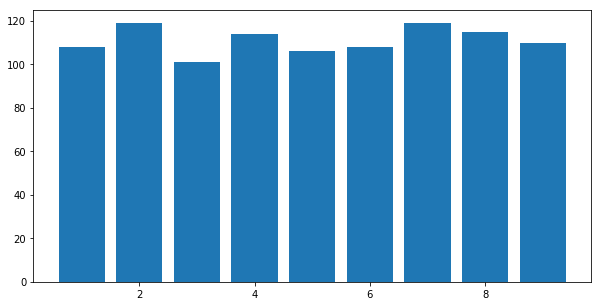

In [48]:
from collections import Counter
m = np.array([np.random.randint(1,10) for _ in range(1000)])
c = Counter(m)
plt.bar(c.keys(),c.values())

# Список литературы <a name='lit'></a>
 
1. Фихтенгольц Г.М.	Основы математического анализа, Том 1-3	Москва, 1968
2. Вентцель Е.С. Теория вероятностей 4-е изд., стереотип. - М.: Наука, Физматгиз, 1969 - 576 с. 
3. Курош А.Г. Курс высшей алгебры Москва: Издательство «Наука», 1966
